In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data_classification.csv', header=None)

In [3]:
data

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
...,...,...,...
95,0.022280,2.658428,0
96,7.630637,7.405351,1
97,3.684997,5.049965,0
98,7.484260,6.059396,1


In [4]:
true_x = []
true_y = []
false_x = []
false_y = []

for item in data.values:
    if item[2] == 1.:
        true_x.append(item[0])
        true_y.append(item[1])
    else:
        false_x.append(item[0])
        false_y.append(item[1])

In [5]:
import matplotlib.pyplot as plt

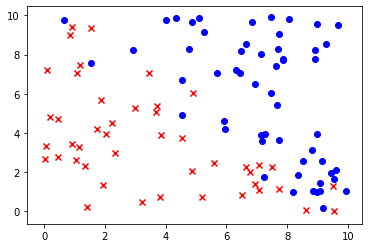

In [6]:
plt.scatter(true_x, true_y, marker='o', c='b')
plt.scatter(false_x, false_y, marker='x', c='r')

In [7]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def classification(p):
    if p >= 0.5:
        return 1
    else:
        return 0

def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

def cost_function(features, labels, weights):
    #features: (100x3)
    #labels: (100x1) 1 or 0
    #weights: (3x1)
    #return cost
    n = len(labels)
    predictions = predict(features, weights)
    #prediction = [0.5, 0.6, 0.9, 0.2] (example)
    cost_class1 = -labels*np.log(predictions)
    cost_class2 = -(1 - labels)*np.log(1 - predictions)
    cost = cost_class1 + cost_class2
    return cost.sum()/n

def update_weight(features, labels, weights, learning_rate):
    #features: (100x3)
    #labels: (100x1) 1 or 0
    #weights: (3x1)
    #learning_rate: float
    #return : new weight: float
    n = len(labels)
    predictions = predict(features, weights)
    gd = np.dot(features.T, (predictions - labels))
    gd = gd/n
    gd = gd*learning_rate
    weights = weights - gd
    return weights

def train(features, labels, weights, learning_rate, iter):
    cost_hs = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_hs.append(cost)
    return weights, cost_hs

In [8]:
model = train(data, data.values[:,2:3], [[0], [1], [1]], 0.008, 10)

In [9]:
predict()

(array([[-0.08546765],
        [ 0.87966262],
        [ 1.00155727]]),
 [1.6461245883526319,
  1.6167245048353802,
  1.5879570503266731,
  1.5598320313243292,
  1.5323568712819493,
  1.5055365368476687,
  1.4793735039128657,
  1.4538677646936142,
  1.4290168756537773,
  1.4048160446389801])

In [21]:
model

(array([[-0.08546765],
        [ 0.87966262],
        [ 1.00155727]]),
 [1.6461245883526319,
  1.6167245048353802,
  1.5879570503266731,
  1.5598320313243292,
  1.5323568712819493,
  1.5055365368476687,
  1.4793735039128657,
  1.4538677646936142,
  1.4290168756537773,
  1.4048160446389801])

In [20]:
p

array([[0.57663744]])

In [19]:
data.values[:,0]

array([4.85506424, 8.62543976, 3.82819154, 7.15095484, 6.47790044,
       1.9222695 , 8.97821589, 6.63560308, 7.67235895, 4.86601533,
       6.86140497, 8.54042132, 3.71788065, 9.18129712, 9.56014002,
       5.97136947, 9.43820269, 4.35755102, 4.54033196, 1.54910163,
       8.08197371, 9.620465  , 8.83477098, 1.75344854, 1.04321284,
       1.19638318, 8.91006988, 4.52961874, 1.85911241, 9.55717884,
       7.15470123, 2.34361853, 2.92268449, 6.33309623, 0.92562818,
       7.87439057, 8.34775105, 5.58106113, 5.09102909, 4.53017137,
       1.42377799, 9.09596013, 4.00661592, 8.97656743, 0.09805288,
       0.45238867, 3.86304627, 7.86385017, 8.92270641, 7.46436788,
       1.34192929, 5.9409696 , 0.90407766, 7.75053006, 9.51792529,
       7.74378671, 7.69192306, 7.09227303, 6.94443908, 0.04502472,
       1.54596913, 5.27238317, 0.86040708, 7.25343893, 7.51730898,
       9.08162719, 0.45567818, 6.94970542, 9.28214252, 7.18081269,
       1.13248839, 7.74652845, 7.06536045, 6.50581749, 5.70052